In [50]:
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm_notebook as tqdm

from template_matching import template_matching
from metrics import ssd, ncc, sad

import sys
sys.path.append('../')
from utils import show_single_frame, show_multiply_frames, get_frames, draw_rois, save_video

### Read data

**Define paths to 3 datasets**

In [51]:
dataset_name = 'bolt'

if dataset_name == 'biker':
    data = '../data/tracking/biker/img'
elif dataset_name == 'basketball':
    data = '../data/tracking/basketball/img'
elif dataset_name == 'bolt':
    data = '../data/tracking/bolt/img'
else:
    raise Exception('Please choose one of the three possible datasets')

**Get data for one of those datasets**

In [52]:
frames, gray_frames = get_frames(data)

**Take frames where object is trackable**

In [53]:
if dataset_name == 'basketball':
    frames = frames[77:270]
    gray_frames = gray_frames[77:270]
if dataset_name == 'bolt':
    frames = frames[:220]
    gray_frames = gray_frames[:220]

**Show sequence of frames**

In [54]:
show_multiply_frames(frames)

interactive(children=(IntSlider(value=0, description='frame_num', max=219), Output()), _dom_classes=('widget-i…

### Preparation for tracking

**Define initial ROI**

In [55]:
if dataset_name == 'biker':
    roi = ((235, 90), (300, 260))
elif dataset_name == 'basketball':
    roi = ((300, 200), (360, 310))
elif dataset_name == 'bolt':
    roi = ((330, 160), (370, 230))

**Show first frame with bounding box**

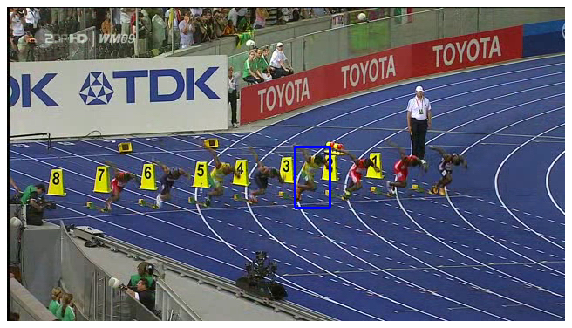

In [56]:
show_single_frame(cv2.rectangle(frames[0].copy(), roi[0], roi[1], (0, 0, 255), 2))

### Perform template matching

**Find best matches**

In [44]:
template = gray_frames[0][roi[0][1]:roi[1][1], roi[0][0]:roi[1][0]]
rois = [roi]
for gray_frame in tqdm(gray_frames[1:]):
    
    # find top left corner for best match
    best_match = template_matching(gray_frame, template, metric=ssd) 
    rois.append((best_match, 
                 (best_match[0] + template.shape[1], best_match[1] + template.shape[0])))
    
    # new template
    template = gray_frame[best_match[1]:best_match[1] + template.shape[0], 
                          best_match[0]:best_match[0] + template.shape[1]] 
    

**Show results**

In [45]:
frames_with_rois = draw_rois(frames, rois)
show_multiply_frames(frames_with_rois)

interactive(children=(IntSlider(value=0, description='frame_num', max=219), Output()), _dom_classes=('widget-i…

### Save result as video

In [47]:
save_video('../videos/template_matching_{}'.format(dataset_name), frames_with_rois)